In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

#import data
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')

#set target data
churn_target = churn_data.iloc[:,-1]

#set feature data
churn_data.drop(["customerID", "Churn"], axis=1, inplace=True)

#set training and test variables
X = np.array(churn_data)
y = np.array(churn_target)

#set variables for target and features
features = list(churn_data)
targets = list(churn_target)

#divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#set seaborn style and fontsize
sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

In [2]:
import time
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#fit the model and time it
start = time.time()

#train the model using the training sets
clf.fit(X_train, y_train)

stop = time.time()

#predict the response for test dataset
y_pred = clf.predict(X_test)

print(f"Training: {stop - start} seconds")
print()

print("Predicted values:", y_pred)
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()

print (f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")
print()

print("Report:")
print(classification_report(y_test, y_pred))
print()

Training: 401.1066675186157 seconds

Predicted values: [0 0 0 ... 0 0 0]

Confusion Matrix:
[[1419  114]
 [ 312  259]]

Accuracy: 79.75285171102662%

Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1533
           1       0.69      0.45      0.55       571

    accuracy                           0.80      2104
   macro avg       0.76      0.69      0.71      2104
weighted avg       0.79      0.80      0.78      2104




ValueError: operands could not be broadcast together with shapes (50,2) (19,) 

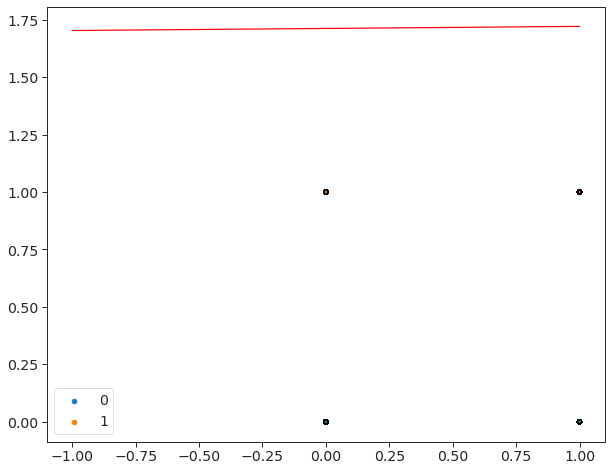

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8)

# Constructing a hyperplane using a formula.
w = clf.coef_[0]           # w consists of 2 elements
b = clf.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

# Encircle support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=19,
            facecolors='none',
            edgecolors='k',
            alpha=.5)

# Step 2 (unit-vector):
w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))

# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)